In [1]:
import numpy as np # IMPORT NECESSARY LIBRARIES
import matplotlib.pyplot as plt

In [2]:
faces = np.load("capture_images/faces.npy") # INPUT THE FACE DATA GENERATED BY INPUT FILE

In [3]:
faces = faces/255 # SCALING

In [4]:
x_faces = faces.reshape(faces.shape[0],84*84) # RESHAPE AND NORMALIZATION
x_faces = (x_faces-x_faces.mean())/x_faces.std()

In [5]:
cov = np.transpose(x_faces)@x_faces # CALCULATION OF COVARIANCE MATRIX AND ITS EIGEN VALUES AND VECTORS
ev, P = np.linalg.eigh(cov)

In [6]:
print(ev)
ar = np.argsort(ev)
print(ar) # ORDER OF EIGEN VALUES
P1 = P[:,ar[::-1]] # SORTING EIGEN VECTORS BY EIGEN VALUES

[-5.11605262e-11 -2.45924230e-11 -1.96256443e-11 ...  1.13337154e+04
  3.58329570e+04  6.77073501e+04]
[   0    1    2 ... 7053 7054 7055]


In [7]:
P2 = P1[:,:50] # TAKING ONLY THE TOP 50 EIGEN VECTORS
Xc = x_faces@P2 # FINDING NEW FEATURE VALUES

In [8]:
# APPLYING CLUSTERING ALGORITHMS
from sklearn.cluster import KMeans
model =KMeans(n_clusters=4)
model.fit(Xc)
cent = model.cluster_centers_
lab = model.labels_
print(lab)

[0 3 0 0 3 2 2 2 2 0 3 3 3 3 3 1 1 1 1 1]


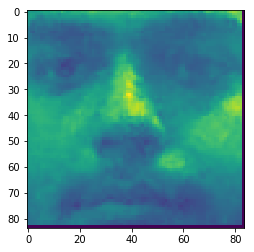

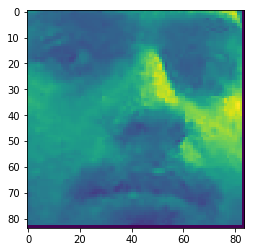

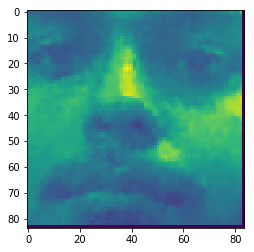

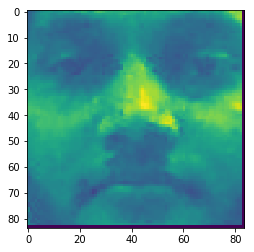

label this person : 


 me


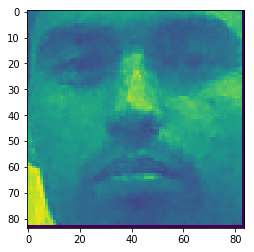

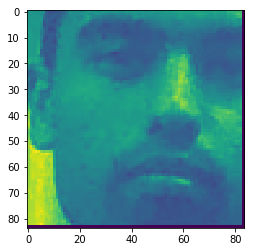

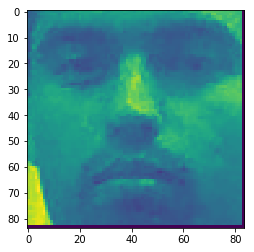

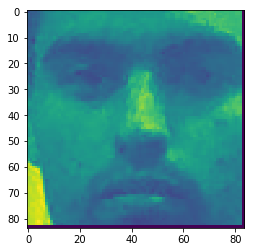

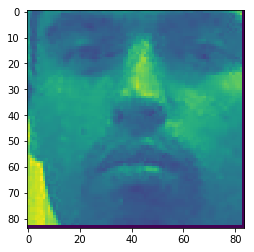

label this person : 


 sanket


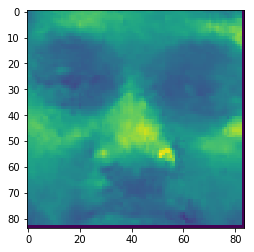

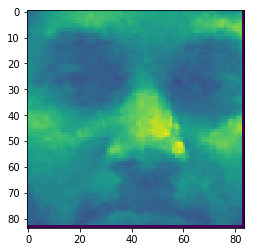

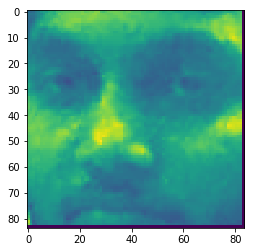

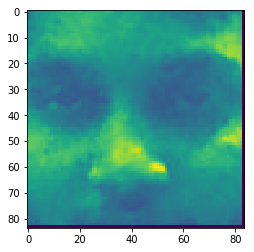

label this person : 


 parikshit


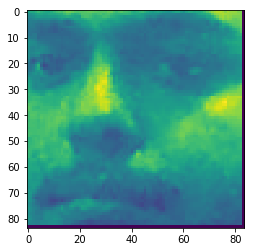

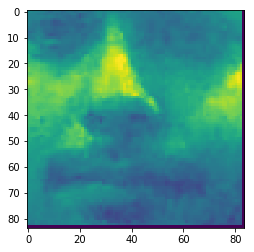

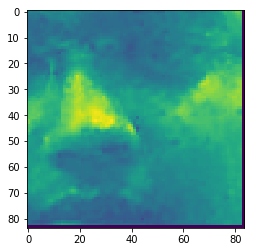

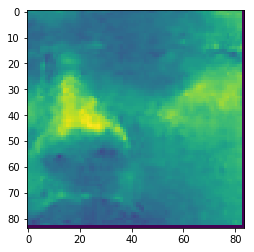

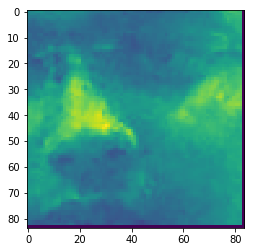

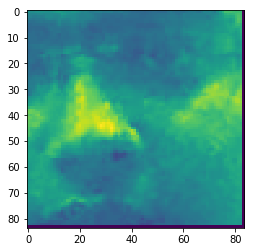

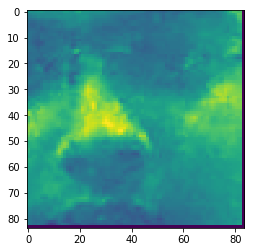

label this person : 


 aradhya


In [13]:
# DISPLAY EVERY IMAGE OF EVERY CLUSTER FOR PROPER LABELING OF CORRESPONDING CLUSTER BY USER
x=[]
import cv2
import matplotlib.pyplot as plt
p=dict()
for i in np.unique(lab[::-1]):
    for j in faces[lab==i]:
        plt.imshow(j)
        plt.show()
    plt.show()
    print("label this person : ")
    x=input()
    p[i] = x
m = np.array(list(p.items()))

In [12]:
np.save("capture_images/eigen",P2) # SAVING THE EIGEN VECTOR MATRIX
np.save("capture_images/centroid",cent) # SAVING THE CENTROIDS OF ALL THE CLUSTERS
np.save("capture_images/lables", m) # SAVING THE LABEL CORRESPONDING TO EACH CLUSTER